Natalia Brzozowska
# Laboratorium 12
## Równania różniczkowe

***
## Zadanie 1
## Metoda Rungego - Kuty
Zaimplementuj metodę Rungego-Kutty czwartego rzędu (rozdział 10.2, Kincaid i Cheney),
a nastepnie:
1. Opisz zalety metody Rungego-Kutty w porównaniu do metody z szeregami Taylora.
2. Rozwiaż zagadnienie poczatkowe dane równaniem $x_{0} = x/t + t sec(x/t)$ z warunkiem poczatkowym $x(0) = 0$. Przedłuż rozwiazanie do t = 1 z krokiem h = 2−7. Porównaj wynik z dokładnym rozwiazaniem:$ x(t) = t* arc sin(t)$.
3. Używajac tej samej metody rozwiąż zagadnienie poczatkowe dane równaniem $x_{0} = 100(sin(t) − x)$ z warunkiem poczatkowym $x(0) = 0$ na przedziale [0, 3] uzywając kroków o rozmiarach h = 0.015, 0.02, 0.025, 0.03. Opisz z czego wynikaja różnice w rozwiazaniach.

***
Metoda Rungego-Kutty służy rozwiązywaniu równań różniczkowych, jednak z pominięciem konieczności obliczenia pochodnych w rozwinięciu Taylora, które zapisuje się za pomocą odpowiedniej funkcji F. Funkcja F przybliża pochodne dla kolejnych elementów w rozwinięciu Taylora, co można zapisać za pomocą wzoru: $ u_{i+1} = u_{i}+ hF(t_{i},u_{i})$.  <br><br>
Poniżej zaimplementowałam funkcję realizującą metodę Rungego-Kutty. Funkcja przyjmuje jako argumenty funkcję f - zagadnienie początkowe, zbiór punktów dziedziny tej funkcji ts - punkty równoodległe z przedziału [t0,t1], odległe od siebie o wartość h, wartość podanej funkcji f dla pierwszego elementu z tablicy ts oraz odległość (krok) h.<br>
W funkcji, najpierw do tablicy wynikowej xs dodawana jest wartość początkowa x0, a nastęnie obliczane są kolejne wartości. Jako, że jest to metoda czwartego rzędu, dla każdego kolejnego t ze zbioru ts, definiowane są 4 wartości: K1,K2,K3,K4, składające się na funkjcę F, przybliżającą pochodne. Te wartości dodawane są do siebie z odpowiednimi wagami i na ich podstawie (oraz poprzedniego elementu tablicy xs) obliczana jest kolejna wartość.

***
#### 1. Zalety  metody Rungego-Kutty w porównaniu do metody z szeregami Taylora.
Najbardziej znaczącą zaletą metody Rungego-Kutty wydaje się być to, że korzystając z niej nie trzeba wielokrotnie liczyć pochodnych (właściwie w ogóle nie trzeba ich liczyć). Dzięki temu można zaoszczędzić wielu prawdopodobnych trudności. <br> Błąd obcięcia tej metody jest rzędu $O(h^{5}) oraz jest ona również prosta w implementacji.

In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [338]:
def Runge_Kutta(f,ts,x0,h):
    
    xs=[]
    xs.append(x0)
    
    for j in range(1,len(ts)):
        t = ts[j-1]
        x = xs[j-1]
        K1 = h*f(t,x)
        K2 = h*f(t+0.5*h, x+0.5*K1)
        K3 = h*f(t+0.5*h, x+0.5*K2)
        K4 = h*f(t+h, x+K3)

        xs.append(x + ((K1+2*K2+2*K3+K4)/6) )
    
    return xs

def test_f(t):
    xs = []
    for a in t:
        xs.append(a * np.arcsin(a))
        
    return xs

def draw2(x,y1,y2):
    plt.figure(figsize=(10,10))
    plt.plot(x,y2, 'b.')
    plt.plot(x,y1, color='red')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Metoda Rungego-Kutty')
    plt.show()

def draw1(x,y,h):
    plt.figure(figsize=(5,5))
    plt.plot(x,y, color='green')
    plt.xlabel('t')
    plt.ylabel('x')
    print('Metoda Rungego-Kutty dla h:',h)
    plt.show()

***
#### 2. Rozwiązanie zagadnienia poczatkowego danego równaniem  $𝑥_{0}=𝑥/𝑡+𝑡𝑠𝑒𝑐(𝑥/𝑡)$ i porównanie z  dokładnym rozwiazaniem: $𝑥(𝑡)=𝑡∗𝑎𝑟𝑐𝑠𝑖𝑛(𝑡)$.

Poniżej zdefiniowałam podaną funkcję f oraz resztę zmiennych potrzebnych do wywołania metody Rungego-Kutty. Jako, że w definicji funkcji f występuje dzielenie przez zmienną t, wartość tej zmiennej nie może być równa 0. Przypisałam jej wartość $t = 10^{-50}$. Utworzyłam wektor ts zawierający równoodległe wartości t, a następnie wywołałam metodę Rungego-Kutty oraz funkcję test_f(), w której zostanie obliczone dokłądne rozwiązanie zgodne ze wzorem z polecenia. <br><br>
Aby porównać wyniki narysowałam oba wykresy - wykres "kropkowy" jest wykresem dokładnego rozwiązania, a czerwona krzywa, przedstawia rozwiązanie wykonane przy pomocy metody Rungego-Kutty (jeden z wykresów jest przedstawiony przy pomocy kropek, aby można było zobaczyć krzywe, mimo nachodzenia na siebie). Wykresy są właściwie identyczne, zatem metoda Runegego-Kutty daje bardzo dobre rezultaty.


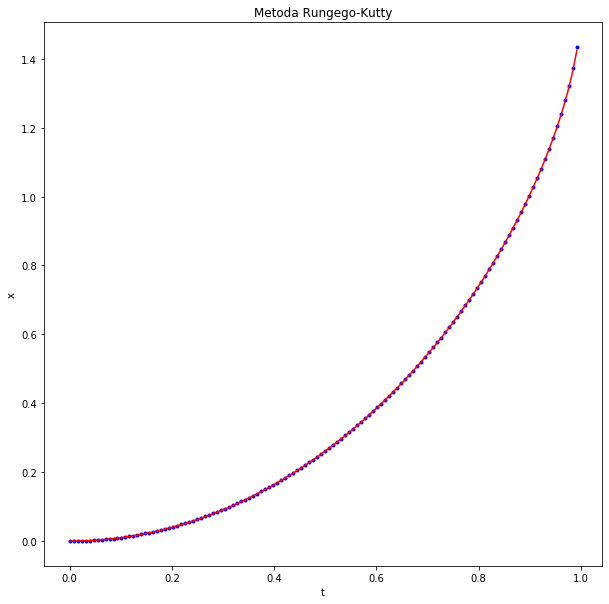

In [339]:
f = lambda t,x: x/t + t*(1/np.cos(x/t))
x0 = 0
h = 2**(-7)
t0 = 10**(-50)
t1 = 1

ts = np.arange(t0,t1,h)
rk = Runge_Kutta(f,ts,x0,h)
test = test_f(ts)

draw2(ts,rk,test)

***
#### 3. Używajac tej samej metody rozwiąż zagadnienie poczatkowe dane równaniem $x_{0} = 100(sin(t) − x)$. Opisz z czego wynikaja różnice w rozwiazaniach.

Rozwiązałam zagadnienie dla podanych wartości h. Przedstawione poniżej wykresy pokazują, że dla pierwszych trzech wartości (0.015, 0.02, 0.025) wyniki są właściwie takie same. Jedynie ostatni wykres znacząco różni się od pozostałych.<br><br>
Dla pierwszych trzech wykresów odległość między kolejnymi wartościamy t, jest odpowiednio mała, tak, że wyniki wychodzą poprawne. W przypadku ostatniego wykresu, dobór wartości h był nieodpowiedni, przez co wykres wyszedł niepoprawny. Wybór wyższego h wpłynął na ilość wartości t w tablicy ts, która była mniejsza niż wcześniej. Wykres jest różny od poszostały prawdopodobnie z powodu wystąpienia błędu obcięcia.

Metoda Rungego-Kutty dla h: 0.015


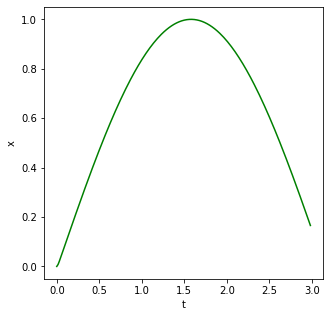

Metoda Rungego-Kutty dla h: 0.02


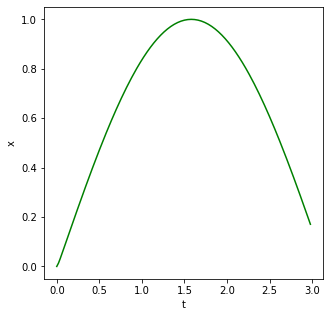

Metoda Rungego-Kutty dla h: 0.025


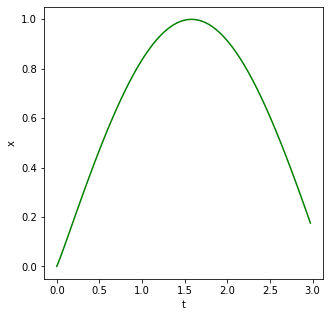

Metoda Rungego-Kutty dla h: 0.03


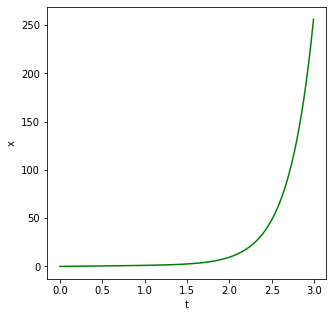

In [345]:
f = lambda t,x: 100*(np.sin(t)-x)
x0 = 0
t0 = 0
t1 = 3

ts1 = np.arange(t0,t1,0.015)
rk1 = Runge_Kutta(f,ts1,x0,0.015)
ts2 = np.arange(t0,t1,0.02)
rk2 = Runge_Kutta(f,ts2,x0,0.02)
ts3 = np.arange(t0,t1,0.025)
rk3 = Runge_Kutta(f,ts3,x0,0.025)
ts4 = np.arange(t0,t1,0.0285)
rk4 = Runge_Kutta(f,ts4,x0,0.0285)



draw1(ts1,rk1,0.015)
draw1(ts2,rk2,0.02)
draw1(ts3,rk3,0.025)
draw1(ts4,rk4,0.03)

***
#### Wnioski
Metoda Rungego-Kutty dobrze sprawdza się przy rozwiązywaniu równań różniczkowych, jednak jedynie wtedy, gdy odległość między kolejnymi wartościami t jest opowiednia. Dla dużych odległości między tymi wartościami wyniki działania tej metody mogą nie być poprawne. Metoda ta jest prosta w implementacji i eliminuje konieczność obliczania pochodnych w rozwinięciu Taylora.

***
## Zadanie 2
## Adaptacyjna metoda Rungego-Kutty-Fehlberga
Zaimplementuj adaptacyjną metodę Rungego-Kutty-Fehlberga (rozdział 10.3, Kincaid
i Cheney) i użyj jej do rozwiazania zagadnienia początkowego: $x_{0} = 3x/t + 9/2t − 13$
z warunkiem brzegowym x(3) = 6 w punkcie x(1/2) z dokładnoscia do 9 miejsc po
przecinku. Porównaj wynik z rozwiązaniem analitycznym $x = t^{3} −9/2t^{2} +13/2t$. W jaki
sposób metoda adaptacyjna pozwala nam zwiększyć dokładność rozwiazania? Jakie są
tego wady?

***
Zaimplementowałam metodę Rungego-Kutty-Fehlberga.<br><br> W pierwszej funkcji Runge_Kutta_Fehlberg() obliczana jest wartość jednego z punktów na podstawie podanych argumentów (f - zagadnienie początkowe, t,x - wartości, h - odległośc między poszczególnymi wartościami t. W tej funkcji obliczanych jest 6 wartości K, z których część jest wykorzystywana do obliczenia następnej wartości x, a część do obliczenia jeszcze kolejnej. Wartość bezwzględna różnicy tych dwóch wartości jest błędem obcięcia, który razem z wyliczoną kolejną wartością x i kolejnym wyliczonym t (t=t+h), jest zwracany z funkcji.<br><br>
Druga funkcja adaptive_RKF() wykorzystuje wcześniej opisaną funkcję Runge_Kutta_Fehlberg() do obliczenia wartości funkcji w punktach t. Różnica między tą metodą a metodą Rugnego-Kutty polega na tym, że w tym przypadku można obliczyć oczekiwany błąd i zależnie od niego, powtórzyć obliczenie lub przyspieszyc proces (zwiększając odległość h). Jeśli bowiem błąd nie jest większy niż zdefiniowany przez użytkownika, wartość h może zostać zwiększona, ponieważ i tak da ten sam rezultat co w przypadku gdyby nie była zmniejszona (w granicach błędu), a zmniejszy liczbę obiegów pętli. Można również zdefiniować maksymalną i minimalną wartość odległości między wartościami t, które również zostaną "przywrócone do porządku" w przypadku przekroczenia granic.<br><br>
Jeśli wartość bezwzględna kroku h jest większa bądź równa krokowi, który jest potrzebny do osiągnięcia granicy przedziału dziedziny t, to funkcja kończy swoje działanie. Jeśli nie, wywoływana jest funkcja Runge_Kutta_Fehlberg(), zwracająca obliczoną wartość x, nową wartość t i nowo-obliczony błąd, który jest sprawdzany.<br><br>
Funkcja przyjmuje argumenty: funkcję f - zagadnienie początkowe, t - wartość początkową t, x - wartość poczatkową x, h - odległość między argumentami t, tb - koniec przedziału t (mniej więcej ostatni element obliczony przez funkcję), itmax - maksymalna liczba iteracji wykonanych przez funkcję (jeśli będzie więcej, funkcja kończy działanie), [emin,emax] - zakres błędu, [hmin,hmax] - zakres odległości h. 

In [346]:
def Runge_Kutta_Fehlberg(f,t,x,h):
  
    c20 = 0.25
    c21 = 0.25
    c30 = 0.375
    c31 = 0.09375
    c32 = 0.28125
    
    c40 = 12/13
    c41 = 1932/2197
    c42 = -7200/2197
    c43 = 7296/2197
    
    c51 = 439/216
    c52 = -8
    c53 = 3680/513
    c54 = -845/4104
    
    c60 = 0.5
    c61 = -8/27
    c62 = 2
    c63= -3544/2565
    c64 = 1859/4104
    c65 = -0.275
    
    a1 = 25/216
    a2 = 0
    a3 = 1408/2565
    a4 = 2197/4104
    a5 = -0.2
    
    b1 = 16/135
    b2 = 0
    b3 = 6656/12825
    b4 = 28561/56430
    b5 = -0.18
    b6 = 2/55
    
    K1 = h*f(t,x)
    K2 = h*f(t + c20*h, x + c21*K1)
    K3 = h*f(t + c30*h, x + c31*K1 + c32*K2)
    K4 = h*f(t + c40*h, x + c41*K1 + c42*K2 + c43*K3)
    K5 = h*f(t + h, x + c51*K1 + c52*K2 + c53*K3 + c54*K4)
    K6 = h*f(t + c60*h, x + c61*K1 + c62*K2 + c63*K3 + c64*K4 + c65*K5)
    
    x4 = x + a1*K1 + a3*K3 + a4*K4 + a5*K5
    x = x + b1*K1 + b3*K3 + b4*K4 + b5*K5 + b6*K6
    
    t = t+h
    e = abs(x-x4)
    
    return x,t,e

def adaptive_RKF(f,t,x,h,tb,itmax,emax,emin,hmin,hmax):
    zn = 0.5*10**-5
    iflag = 1
    k = 0
    xs = []
    ts = []
    xs.append(x)
    ts.append(t)
    
    while k<=itmax:
        k+=1
        if(abs(h)<hmin):
            h = np.sign(h)*hmin
            
        if(abs(h)>hmax):
            h = np.sign(h)*hmax
            
        d = abs(tb-t)

        if(d<=abs(h)):
            iflag = 0
            if d <= zn*max(abs(tb),abs(t)):
                break
            h = np.sign(h)*d
        
        xsave = x
        tsave = t
        x,t,e = Runge_Kutta_Fehlberg(f,t,x,h)


        if iflag==0:
            xs.append(x)
            ts.append(t)
            break


        if e<emin:
            h = 2*h
        elif e>emax:
            h = h/2
            x = xsave
            t = tsave
            k = k-1

        xs.append(x)
        ts.append(t)
        
    return xs,ts

In [347]:
f = lambda t,x: (3*x/t + 9/2*t - 13)
t0 = 3
tb = 0.5
x0 = 6
n = 10000
h = (tb-t0)/n
print(h)

hmin = abs(h)*10**-2
hmax = abs(h)*10**2
emax = 10**-8
emin = 10**-10
x,t = adaptive_RKF(f,t0,x0,h,tb,n,emax,emin,hmin,hmax)

-0.00025


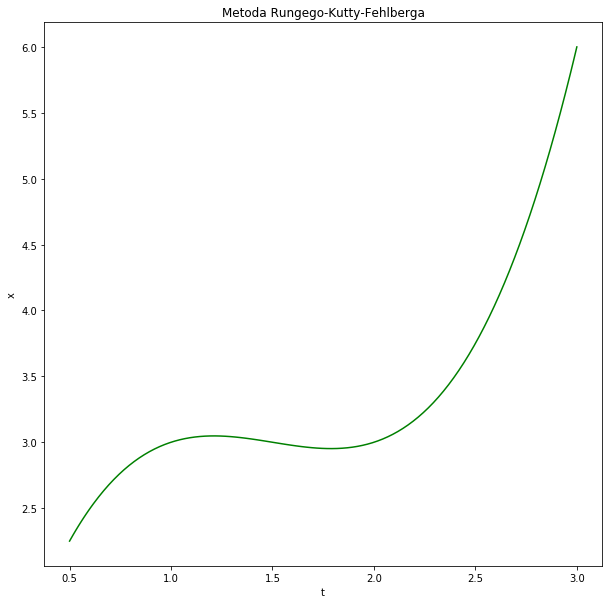

In [348]:
plt.figure(figsize=(10,10))
plt.plot(t,x, color = 'green')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Metoda Rungego-Kutty-Fehlberga')
plt.show()

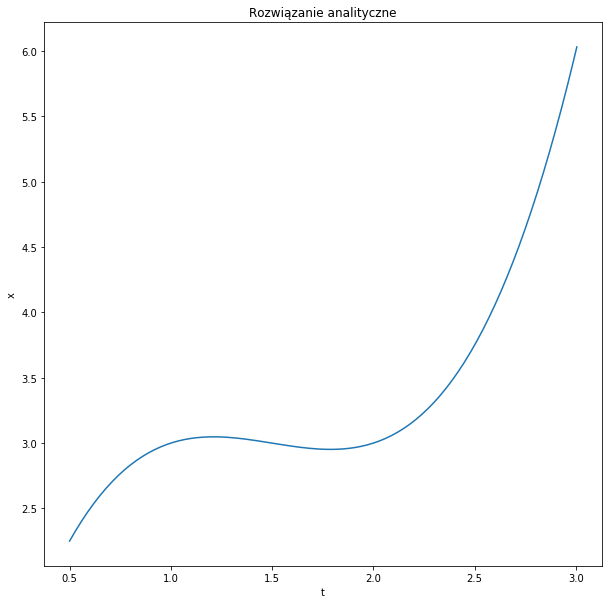

In [349]:
f2 = lambda t :t**3 - 9/2*(t**2) + 13/2*t
ts = np.arange(0.5,3.015,0.015)
xs = [f2(t) for t in ts]


plt.figure(figsize=(10,10))
plt.plot(ts,xs)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Rozwiązanie analityczne')
plt.show()

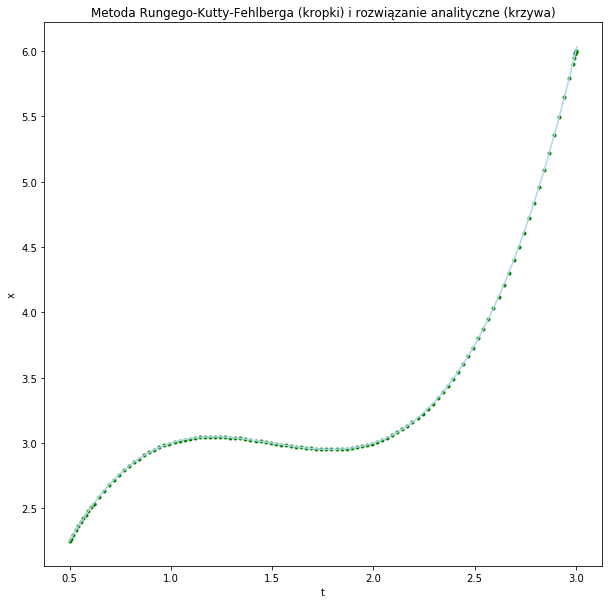

In [350]:
plt.figure(figsize=(10,10))
plt.plot(t,x, 'g.')
plt.plot(ts,xs, color = 'lightblue')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Metoda Rungego-Kutty-Fehlberga (kropki) i rozwiązanie analityczne (krzywa)')
plt.show()

***
Na powyższych wykresach można zauważyć, że adaptacyjna metoda Rungego-Kutty-Fehlberga daje poprawne wyniki, równe rozwiązaniu analitycznemu.<br><br>
Dzięki metodzie adaptacyjnej można zwiększyć dokładność rozwiązania, ponieważ udostępnia ona możliwość ustawienia granicy błędu obcięcia. Dzięki czemu, jeżeli wyliczony błąd nie mieści się w zakresie, w funkcji zmieniana jest wartość h i obliczenie wykonywane jest raz jeszcze dla nowego h, aż do momentu, gdy wartość błędu bęzie mieściła się w zakresie. Dzięki tej metodzie można również przyspieszyć wykonywanie obliczeń, jeśli odpowiednio dobierzemy zakresy argumentów.<br><br>
Wadą tego rozwiążania może być możliwość wybrania przez użytkownika złego zakresu argumentów, przez co pętla wewnątrz funkcji będzie "kręcić się" w nieskończoność. Również aby uzyskać odpowiednią dokładność potrzebna jest odpowiednia ilość obiegów pętli, co przy złym dobraniu argumentów, może kosztować pewną ilość czasu.